# Plotting with Pandas

A lot of the work we did with `matplotlib` was:

1. Getting the data into the right format to plot (extracting `x` and `y`)
2. Setting each of the axes properties to fill out labels and styles

Turns out we can simplify this greatly by using the `matplotlib` integration in Pandas. Also check out [Altair](https://github.com/altair-viz/altair_pandas) and [Bokeh](https://pypi.org/project/pandas-bokeh/) backends for Pandas plotting for *nicer* plots

## Grab Data

In [1]:
import pandas as pd
DATA_FOLDER = "../../data"
df_ds = pd.read_csv(f'{DATA_FOLDER}/google_search_trends/multiTimeline.csv', skiprows=1,parse_dates=["Month"])
df_ai = pd.read_csv(f'{DATA_FOLDER}/google_search_trends/multiTimeline-ai.csv', skiprows=1,parse_dates=["Month"])
df_viz = pd.read_csv(f'{DATA_FOLDER}/google_search_trends/multiTimeline-visualization.csv', skiprows=1,parse_dates=["Month"])

for df in [df_ds, df_ai, df_viz]:
    df.rename(columns={df.columns[-1]:df.columns[-1].replace(": (Worldwide)","")},inplace=True)

# EXERCISE

- Reproduce the multi-line plot using Pandas plot

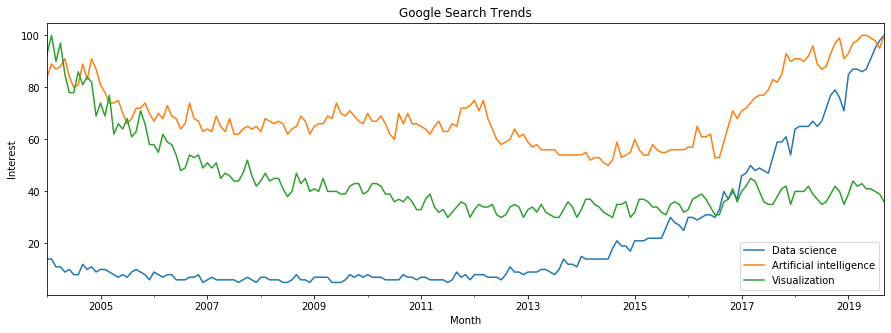

In [54]:
dfs = df_ds.merge(df_ai, on="Month").merge(df_viz, on="Month")

ax = dfs.plot(x="Month", figsize=(15,5), title="Google Search Trends")
ax.set_ylabel("Interest");

In [3]:
# Your Solution

# EXERCISE

- Reproduce the 3-subplot plot using Pandas plot
    - This time use 3 rows

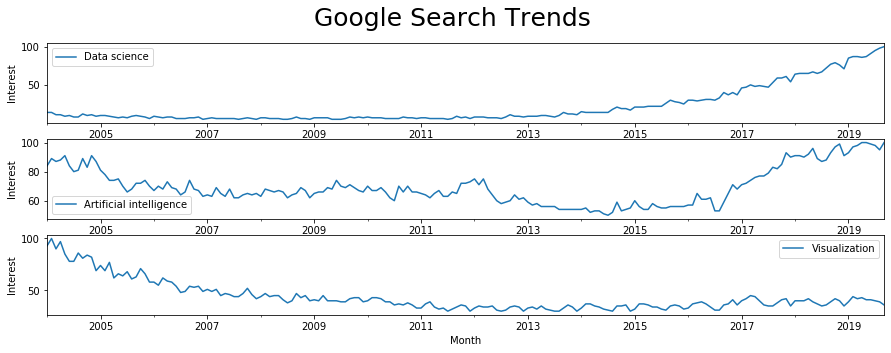

In [53]:
# Solution

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,5)) # HINT start by defining the subplot axes
for ax,df in zip(axes,[df_ds,df_ai,df_viz]):
    ax = df.plot(x="Month", ax=ax)
    ax.set_ylabel("Interest")
fig.suptitle("Google Search Trends", fontsize=25);

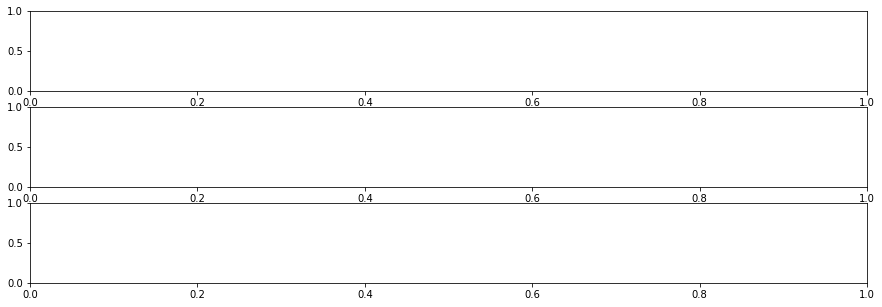

In [55]:
# Your Solution
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,5)) # HINT start by defining the subplot axes

# Other plots

We can make a lot of different kinds of plots (histograms, pie charts, area charts, ...) in this way. As you may have noticed in the `df.plot()` docstring, we can specify `kind="..."` to control this. **Before we move on, try and make a histogram**

# EXERCISE

- Make a histogram!
- Which *interest* values occur most for each search term?

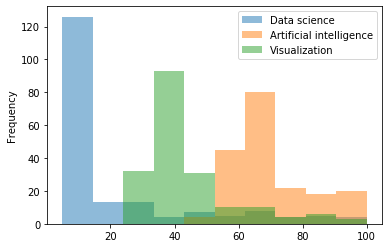

In [57]:
# Solution
dfs.plot(x="Month", kind="hist", alpha=0.5)

In [ ]:
# Your Solution

# Summing it up

The Pandas `matplotlib` integration is great for *quick* plots and to get started on building larger `matplotlib` beasts (since it spits out axes objects), but there are better tools for creating visualizations.